In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from tqdm import tqdm
from simulate import simulate
import multiprocessing as mp

### Define jobs to run

In [3]:
jobs = np.zeros((6), dtype=[('N', int), ('Lx', int), ('Ly',int), ('step size',float), ('infection rate',float),\
                           ('pollution rate',float), ('decay rate',float), ('time',int)] )

In [ ]:
Lx = 30
Ly = 30
stepSize = 0.5

In [11]:
realisations = 500
tMax = 1000
#---------------N--Lx--Ly--step--inf rate--poll rate--decay--time
jobs[0] = tuple([200, Lx, Ly, stepSize, 0.7, 0.2, 0.95, tMax])
jobs[1] = tuple([200, Lx, Ly, stepSize, 0.7, 0.0, 0.0, tMax])
jobs[2] = tuple([100, Lx, Ly, stepSize, 0.7, 0.2, 0.95, tMax])
jobs[3] = tuple([100, Lx, Ly, stepSize, 0.7, 0.0, 0.0, tMax])
jobs[4] = tuple([50, Lx, Ly, stepSize, 0.7, 0.2, 0.95, tMax])
jobs[5] = tuple([50, Lx, Ly, stepSize, 0.7, 0.0, 0.0, tMax])

lbls = ['N=200, with env', 'N=200, no env', 'N=100, with env', 'N=100, no env', 'N=50, with env', 'N=50, no env']

In [12]:
%%time
results = []
if __name__ ==  '__main__':
    i=0
    for job in tqdm(jobs):
        i+=1
        works = [job for i in range(realisations)]
        with mp.Pool(mp.cpu_count()) as pool:
            p_r = pool.map_async(simulate, works)
            results.append(p_r.get())
        print('Job '+str(i)+" Done!")

Job 1 Done!
Job 2 Done!
Job 3 Done!
Job 4 Done!
Job 5 Done!
Job 6 Done!
Wall time: 17min 33s


#### you want pop density? run this!

In [15]:
results = [results[i]/jobs[i][0] for i in range(jobs.shape[0])]

### Plot results

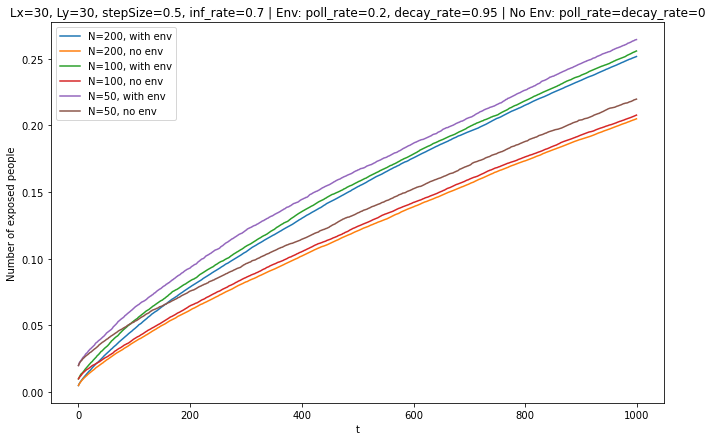

In [17]:
t = np.arange(tMax)
ts = [np.mean(res, axis=0) for res in results]
errors = [np.std(res, axis=0) for res in results]
fig, ax = plt.subplots(figsize=(11, 7))
for i in range(jobs.shape[0]):
    plt.plot(t, ts[i], label=lbls[i])
    ax.fill_between(t, ts[i]+errors[i]/2, ts[i]-errors[i]/2, alpha=0.5)
ax.set_xlabel("t")
ax.set_ylabel("Number of exposed people")
ax.set_title("Lx="+str(Lx)+", Ly="+str(Ly)+", stepSize="+str(stepSize)+", inf_rate=0.7 | Env: poll_rate="+str(0.2)+", decay_rate="+str(0.95)+" | No Env: poll_rate=decay_rate=0")
ax.legend()